# City Hospitals Analysis

City growth affects each city's hospitals, schools etc. This growth happens because
of the people's demands. Because of this growth it affects the price of
everything. So the government wants to open a new hospital but first of all they
want to see information about the number of each regional hospital , over the age
analysis and each department's sum of deposit.

**Project Overview and Objective: Hospital Data Analysis**

This project aims to analyze a dataset related to hospital information. The dataset contains various factors within hospitals, and the goal is to understand if these factors impact hospital performance.

**Description of Columns:**

1. **Unnamed: 0:**
   - Contains an unnamed sequence number.
   - This column doesn't provide specific information and won't be used in the analysis.

2. **case_id:**
   - Uniquely identifies a hospital case.
   - Contains no missing values.

3. **Hospital_region_code:**
   - Indicates the region code of the hospital.
   - Contains no missing values.

4. **Available Extra Rooms in Hospital:**
   - Represents the number of available extra rooms in the hospital.
   - Contains no missing values.

5. **Department:**
   - Specifies the department in the hospital (e.g., Surgery, Pediatrics, etc.).
   - Contains no missing values.

6. **Ward_Type:**
   - Indicates the type of ward where the patient is placed.
   - Contains no missing values.

7. **Ward_Facility_Code:**
   - Contains the code of the facility where the ward is located.
   - Contains no missing values.

8. **Type of Admission:**
   - Specifies the type of patient admission (Emergency, Elective, etc.).
   - Contains no missing values.

9. **Severity of Illness:**
   - Indicates the severity of the patient's illness (Minor, Moderate, Major).
   - Contains no missing values.

10. **Visitors with Patient:**
    - Represents the number of visitors with the patient.
    - Contains no missing values.

11. **Age:**
    - Specifies the age of the patient.
    - Contains no missing values.

12. **Admission_Deposit:**
    - Represents the deposit amount required when admitted to the hospital.
    - Contains no missing values.

The project involves analyzing factors that influence hospital performance and using these insights to predict relevant outcomes. The results of the analysis can be utilized to enhance or optimize the quality of services provided by hospitals.


# EDA (Exploratory Data Analysis)
### Data Set Review

In this project, we will use a dataset containing hospital data. The dataset is downloaded from the website [https://app.gamboo.io/]. Data set; Unnamed: 0, case_id, Hospital_region_code, Available Extra Rooms in Hospital, Department, Ward_Type, Ward_Facility_Code, Type of Admission, Severity of Illness, Visitors with Patien, It contains information such as Admission_Deposit. The dataset has a total of 318438 rows and 18 columns.

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv("hospitaldataset.csv")

## Data Cleaning and Preprocessing

Before analysing the dataset, we will perform data cleaning and pre-processing steps. These steps are as follows:

  We will use the data.head() and data.info() functions to examine the structure and properties of the data set.

  We will use the data.isnull().sum() function to check for missing values in the data set. We will see if there are any missing values in the data set. We will fill these missing values with the average of the relevant columns. To do this, we will use the function data.fillna(data.mean()).

  We will use the function pd.get_dummies() to numerically encode the categorical variables in the dataset. This will make the dataset suitable for machine learning models.

In [3]:
data.head()
data.info()
data.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         318438 non-null  int64  
 1   case_id                            318438 non-null  int64  
 2   Hospital_region_code               318438 non-null  object 
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Type of Admission                  318438 non-null  object 
 8   Severity of Illness                318438 non-null  object 
 9   Visitors with Patient              318438 non-null  int64  
 10  Age                                318438 non-null  object 
 11  Admission_Deposit                  3184

Unnamed: 0                           159218.500000
case_id                              159219.500000
Available Extra Rooms in Hospital         3.197627
Visitors with Patient                     3.284099
Admission_Deposit                      4880.749392
dtype: float64

# Analyses and Visualisations

 After cleaning and pre-processing the dataset, we will use various graphs to analyse and visualise the relationships and distributions between variables in the dataset. These graphs are the following:

### Regional Hospital Number & Analysis

Number of Regional Hospitals:
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64


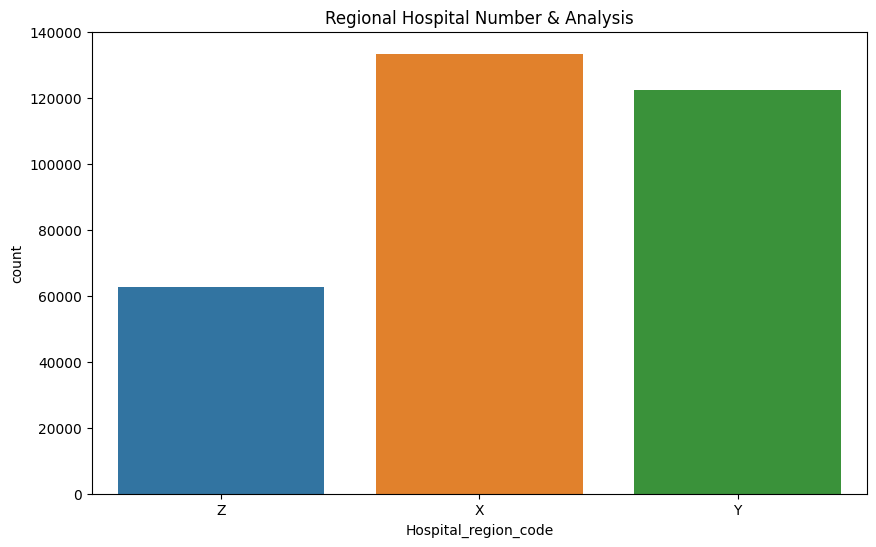

In [4]:
regional_hospital_counts = data['Hospital_region_code'].value_counts()
print("Number of Regional Hospitals:")
print(regional_hospital_counts)

import seaborn as sns
import matplotlib.pyplot as plt

# Visualise the number of regional hospitals
plt.figure(figsize=(10, 6))
sns.countplot(x='Hospital_region_code', data=data)
plt.title('Regional Hospital Number & Analysis')
plt.show()

###  Age Analysis

Age Analysis
41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64


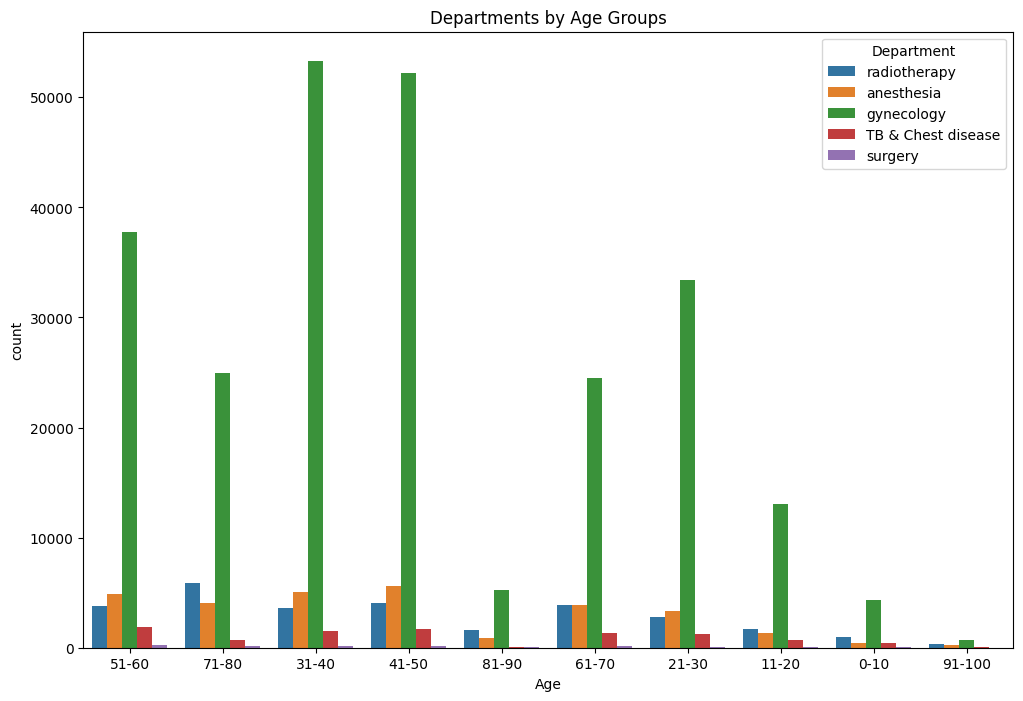

In [5]:
age_analysis = data['Age'].value_counts()
print("Age Analysis")
print(age_analysis)


# Analyses on age groups
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', data=data, hue='Department')
plt.title('Departments by Age Groups')
plt.show()



### Total Deposits of Each Department

This graph shows the distribution of deposits in each hospital region as a box plot. This can help us understand the impact of regional differences on deposits.

Total Deposits of Each Department
Department
TB & Chest disease    4.931312e+07
anesthesia            1.570544e+08
gynecology            1.201168e+09
radiotherapy          1.407461e+08
surgery               5.934820e+06
Name: Admission_Deposit, dtype: float64


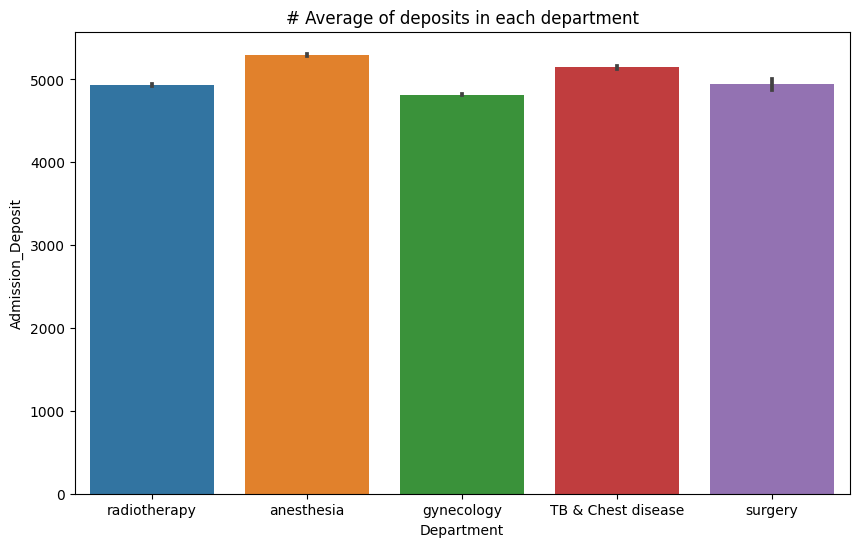

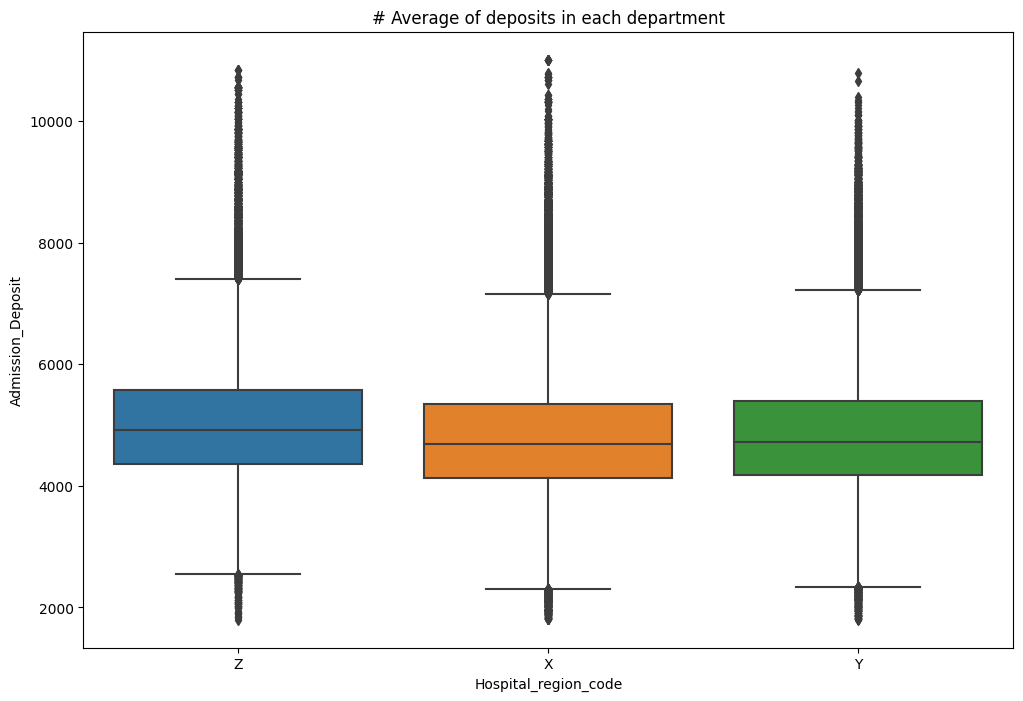

In [6]:
department_deposit_sum = data.groupby('Department')['Admission_Deposit'].sum()
print("Total Deposits of Each Department")
print(department_deposit_sum)

# Average of deposits in each department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Admission_Deposit', data=data)
plt.title('# Average of deposits in each department')
plt.show()

# Average of deposits in each department
plt.figure(figsize=(12, 8))
sns.boxplot(x='Hospital_region_code', y='Admission_Deposit', data=data)
plt.title('# Average of deposits in each department')
plt.show()



### Regional Distribution of the Number of Patients

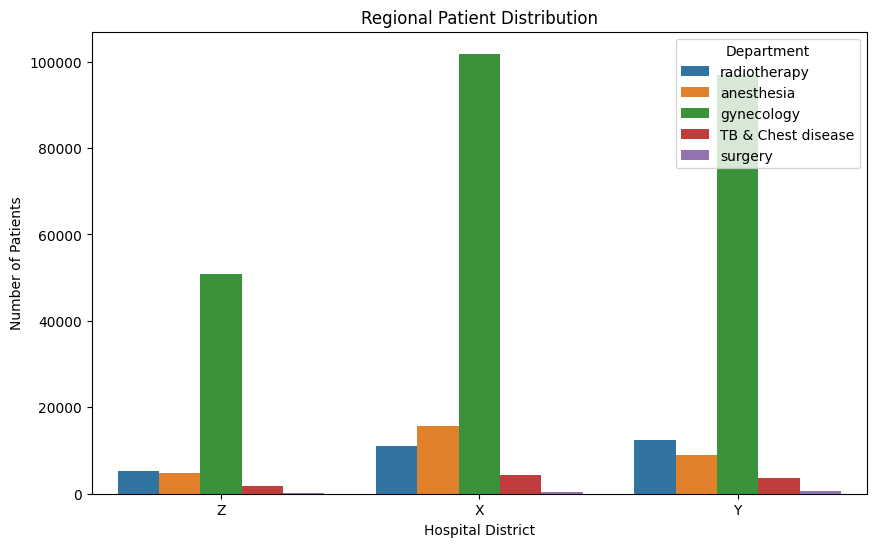

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hospital_region_code', data=data, hue='Department')
plt.title('Regional Patient Distribution')
plt.xlabel('Hospital District')
plt.ylabel('Number of Patients')
plt.legend(title='Department', loc='upper right')
plt.show()


### Regional Distribution and Age Analysis of the Number of Visitors

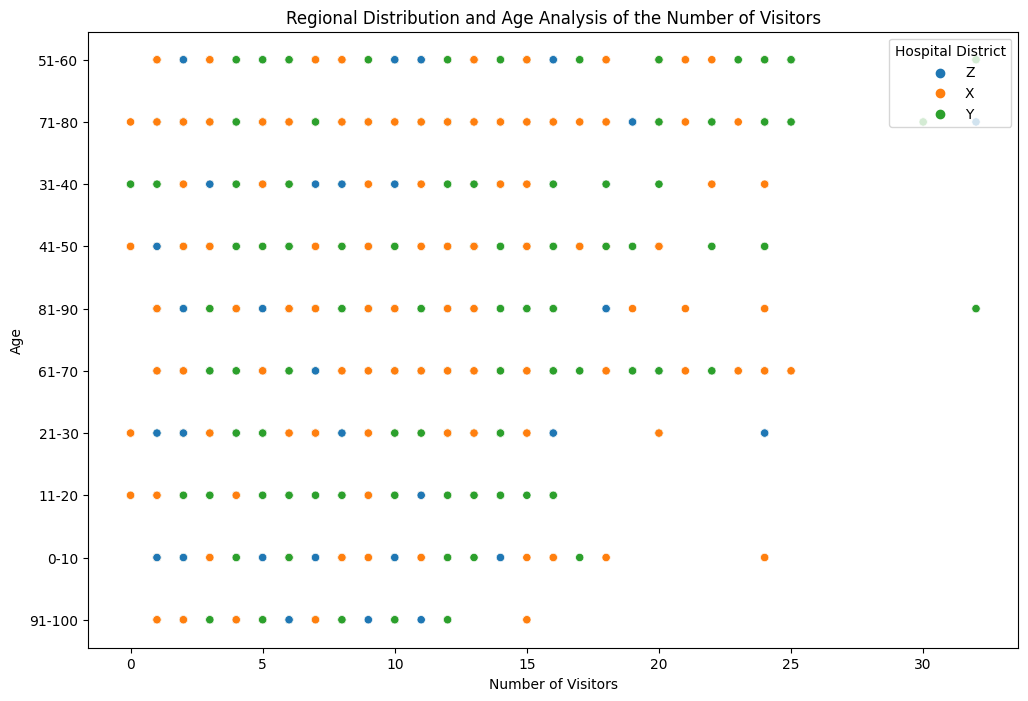

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Visitors with Patient', y='Age', hue='Hospital_region_code', data=data)
plt.title('Regional Distribution and Age Analysis of the Number of Visitors')
plt.xlabel('Number of Visitors')
plt.ylabel('Age')
plt.legend(title='Hospital District', loc='upper right')
plt.show()

### Distribution of Hospital Admission Types

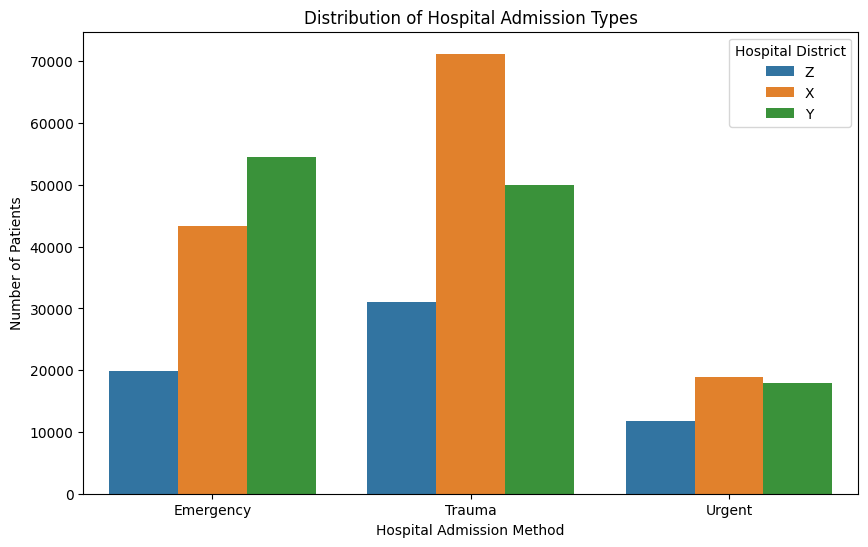

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Admission', data=data, hue='Hospital_region_code')
plt.title('Distribution of Hospital Admission Types')
plt.xlabel('Hospital Admission Method')
plt.ylabel('Number of Patients')
plt.legend(title='Hospital District', loc='upper right')
plt.show()


# ANOVA (Analysis of Variance)

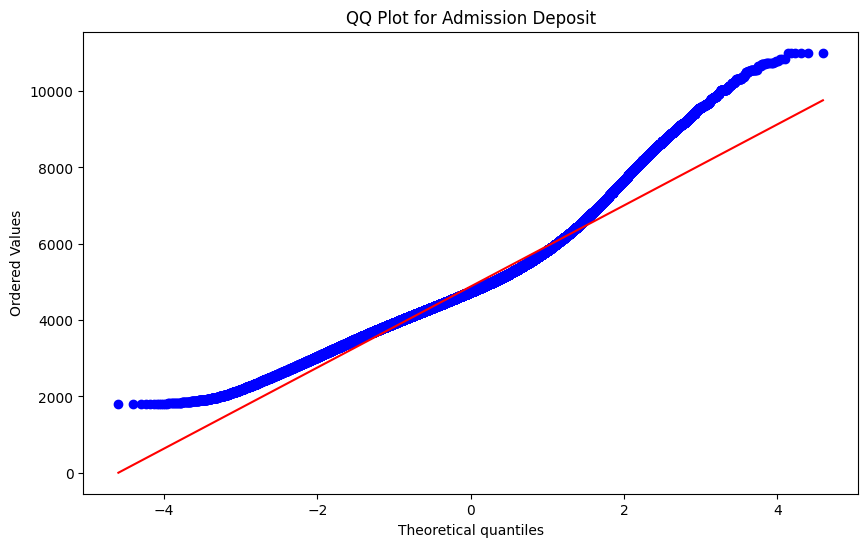

Levene Test Result: LeveneResult(statistic=5.3976990336824215, pvalue=0.0045273996125693204)
Durbin-Watson Test Result: 0.07796392108451655


In [13]:
data=pd.read_csv("hospitaldataset.csv")
data.fillna(data.mean(), inplace=True)
data = pd.get_dummies(data)

# QQ plot to check the assumption of normal distributionQQ plot to check the assumption of distribution
plt.figure(figsize=(10, 6))
stats.probplot(data['Admission_Deposit'], plot=plt)
plt.title('QQ Plot for Admission Deposit')
plt.show()

# Levene test to check the assumption of homogeneity of variance
levene_test = stats.levene(data['Admission_Deposit'][data['Hospital_region_code_X'] == 1],
                           data['Admission_Deposit'][data['Hospital_region_code_Y'] == 1],
                           data['Admission_Deposit'][data['Hospital_region_code_Z'] == 1])
print('Levene Test Result:', levene_test)

# Durbin-Watson test to check the assumption of observation independence
durbin_watson_test = sm.stats.stattools.durbin_watson(data['Admission_Deposit'])
print('Durbin-Watson Test Result:', durbin_watson_test)


# Welch Test

In [24]:
import pandas as pd
import scipy.stats as stats
import pingouin as pg

data=pd.read_csv("hospitaldataset.csv")
data.fillna(data.mean(), inplace=True)
data = pd.get_dummies(data)

# Welch testi
welch_test = pg.welch_anova(dv='Admission_Deposit', between='Hospital_region_code_X', data=data)
print('Welch Test Result:', welch_test)


Welch Test Result:                    Source  ddof1  ...          p-unc       np2
0  Hospital_region_code_X      1  ...  6.413093e-167  0.002382

[1 rows x 6 columns]
